In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline

In [3]:
detect  = pd.read_csv("detect_fraud.csv")
detect.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,07/11/17 9:30,NaN,0
1,105560,25,1,17,259,07/11/17 13:40,NaN,0
2,101424,12,1,19,212,07/11/17 18:05,NaN,0
3,94584,13,1,13,477,07/11/17 4:58,NaN,0
4,68413,12,1,1,178,09/11/17 9:00,NaN,0


In [4]:
detect.memory_usage(index=True, deep=False)

Index                  80
ip                 800000
app                800000
device             800000
os                 800000
channel            800000
click_time         800000
attributed_time    800000
is_attributed      800000
dtype: int64

In [5]:
detect.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [6]:
detect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [7]:
len(detect.index)

100000

In [8]:
dtype={'ip':'uint16',
     'app':'uint8',
     "device":'uint8',
     'os':'uint8',
     'channel':'uint8',
      'click-time':'uint8'
           }

In [9]:
detect.memory_usage(index=True, deep=False)

Index                  80
ip                 800000
app                800000
device             800000
os                 800000
channel            800000
click_time         800000
attributed_time    800000
is_attributed      800000
dtype: int64

In [10]:
detect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [11]:
detect  = pd.read_csv("detect_fraud.csv",dtype=dtype)
detect.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,22004,12,1,13,241,07/11/17 9:30,NaN,0
1,40024,25,1,17,3,07/11/17 13:40,NaN,0
2,35888,12,1,19,212,07/11/17 18:05,NaN,0
3,29048,13,1,13,221,07/11/17 4:58,NaN,0
4,2877,12,1,1,178,09/11/17 9:00,NaN,0


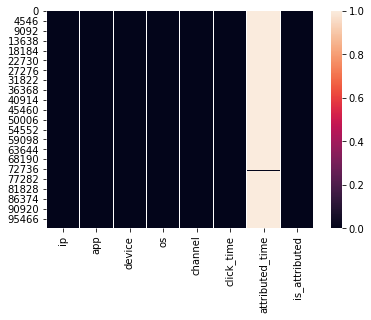

In [12]:
sns.heatmap(detect.isnull())

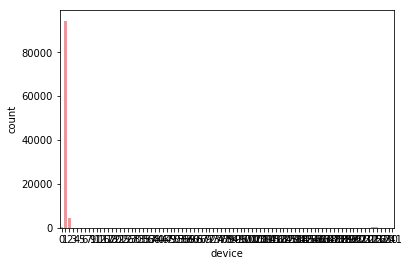

In [13]:
sns.countplot(x="device", data=detect)


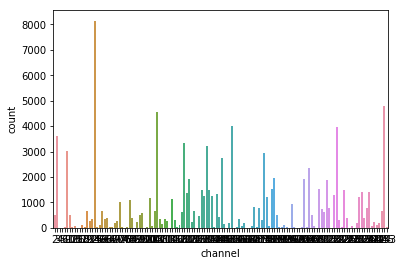

In [14]:
sns.countplot(x="channel", data=detect)


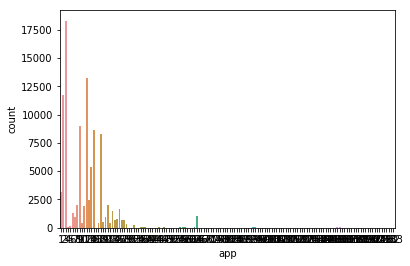

In [15]:
sns.countplot(x="app", data=detect)

In [16]:
#sns.countplot(x="ip", data=detect)......... it will take time to plot the graph


In [17]:
detect.head(50)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,22004,12,1,13,241,07/11/17 9:30,NaN,0
1,40024,25,1,17,3,07/11/17 13:40,NaN,0
2,35888,12,1,19,212,07/11/17 18:05,NaN,0
3,29048,13,1,13,221,07/11/17 4:58,NaN,0
4,2877,12,1,1,178,09/11/17 9:00,NaN,0
5,28127,3,1,17,115,09/11/17 1:22,NaN,0
6,17059,1,1,17,135,09/11/17 1:17,NaN,0
7,55969,9,1,25,186,07/11/17 10:01,NaN,0
8,61895,2,2,22,108,08/11/17 9:35,NaN,0
9,12564,3,1,19,135,08/11/17 12:35,NaN,0


In [18]:
detect.tail(50)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
99950,11221,12,1,19,245,07/11/17 23:01,NaN,0
99951,13716,18,1,13,134,07/11/17 10:08,NaN,0
99952,4948,26,1,18,121,07/11/17 1:15,NaN,0
99953,37028,2,1,3,219,08/11/17 10:29,NaN,0
99954,36699,29,1,30,213,08/11/17 9:15,NaN,0
99955,25294,21,1,53,128,09/11/17 7:09,NaN,0
99956,65465,24,1,19,105,08/11/17 9:43,NaN,0
99957,15914,3,1,25,24,08/11/17 7:25,NaN,0
99958,14820,18,1,13,107,08/11/17 14:18,NaN,0
99959,63431,25,1,8,3,08/11/17 0:19,NaN,0


In [19]:
major_apps=detect.groupby('app')

df1=major_apps.size()
df1.head()

app
1     3135
2    11737
3    18279
4       58
5      189
dtype: int64

In [20]:
df2=df1.reset_index(name='covrage')
df2.head()

,app,covrage
0,1,3135
1,2,11737
2,3,18279
3,4,58
4,5,189


In [21]:
identified=df2[df2['covrage']>df2['covrage'].quantile(0.8)]         
identified

,app,covrage
0,1,3135
1,2,11737
2,3,18279
4,5,189
5,6,1303
6,7,981
7,8,2004
8,9,8992
9,10,390
10,11,1928


In [22]:
x=detect['click_time'] 

In [23]:
x = pd.to_datetime(x)                               #we have segreagated the click_time from the dataset...

In [24]:
x.head()

0   2017-07-11 09:30:00
1   2017-07-11 13:40:00
2   2017-07-11 18:05:00
3   2017-07-11 04:58:00
4   2017-09-11 09:00:00
Name: click_time, dtype: datetime64[ns]

In [25]:
detect['year']=x.dt.year                        #segregated the year...
detect.head()


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,year
0,22004,12,1,13,241,07/11/17 9:30,NaN,0,2017
1,40024,25,1,17,3,07/11/17 13:40,NaN,0,2017
2,35888,12,1,19,212,07/11/17 18:05,NaN,0,2017
3,29048,13,1,13,221,07/11/17 4:58,NaN,0,2017
4,2877,12,1,1,178,09/11/17 9:00,NaN,0,2017


In [26]:
detect['month']=x.dt.month                            #segregated the month...
detect.head()


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,year,month
0,22004,12,1,13,241,07/11/17 9:30,NaN,0,2017,7
1,40024,25,1,17,3,07/11/17 13:40,NaN,0,2017,7
2,35888,12,1,19,212,07/11/17 18:05,NaN,0,2017,7
3,29048,13,1,13,221,07/11/17 4:58,NaN,0,2017,7
4,2877,12,1,1,178,09/11/17 9:00,NaN,0,2017,9


In [27]:
detect['day']=x.dt.dayofweek                        #segregated the dayofweek...
detect.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,year,month,day
0,22004,12,1,13,241,07/11/17 9:30,NaN,0,2017,7,1
1,40024,25,1,17,3,07/11/17 13:40,NaN,0,2017,7,1
2,35888,12,1,19,212,07/11/17 18:05,NaN,0,2017,7,1
3,29048,13,1,13,221,07/11/17 4:58,NaN,0,2017,7,1
4,2877,12,1,1,178,09/11/17 9:00,NaN,0,2017,9,0


In [28]:
detect['hour']=x.dt.hour                             #segregated the hour in time... 
detect.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,year,month,day,hour
0,22004,12,1,13,241,07/11/17 9:30,NaN,0,2017,7,1,9
1,40024,25,1,17,3,07/11/17 13:40,NaN,0,2017,7,1,13
2,35888,12,1,19,212,07/11/17 18:05,NaN,0,2017,7,1,18
3,29048,13,1,13,221,07/11/17 4:58,NaN,0,2017,7,1,4
4,2877,12,1,1,178,09/11/17 9:00,NaN,0,2017,9,0,9


In [29]:
                                    #uniqu values in the dtaset to identified how many repeated app are there...
len(detect['ip'].unique())        

28470

In [30]:
len(detect['app'].unique()) 

143

In [31]:
len(detect['is_attributed'].unique())        

2

In [32]:
len(detect['click_time'].unique())        

4309

In [33]:
len(detect['channel'].unique())        

134

In [34]:
len(detect['device'].unique())        

86

In [35]:
freq1 = pd.DataFrame(detect.groupby('ip').size())
freq1.head()

,0
ip,
8,1
9,1
10,3
14,1
16,6


In [36]:
freq2 = pd.DataFrame(detect.groupby('app').size())
freq2.head()

,0
app,
1,3135
2,11737
3,18279
4,58
5,189


In [37]:
freq3 = pd.DataFrame(detect.groupby('channel').size())
freq3.head()

,0
channel,
2,509
3,3618
4,1
5,8
6,18


In [38]:
ip_device_hour=detect.groupby(['ip','device','hour']).channel.count().reset_index(name="ip_device_hour")
ip_device_hour.head()

,ip,device,hour,ip_device_hour
0,8,1,11,1
1,9,1,16,1
2,10,1,1,1
3,10,1,7,1
4,10,1,11,1


In [39]:
ip_app_device = detect.groupby(['ip','app','device']).channel.count().reset_index(name='ip_app_device')
ip_app_device.head()

,ip,app,device,ip_app_device
0,8,11,1,1
1,9,9,1,1
2,10,11,1,1
3,10,12,1,1
4,10,18,1,1


In [40]:
df1=pd.merge(detect,ip_device_hour,on=['ip','device','hour'])
df1.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,year,month,day,hour,ip_device_hour
0,22004,12,1,13,241,07/11/17 9:30,NaN,0,2017,7,1,9,1
1,40024,25,1,17,3,07/11/17 13:40,NaN,0,2017,7,1,13,8
2,40024,2,1,18,179,08/11/17 13:28,NaN,0,2017,8,4,13,8
3,40024,12,1,6,178,09/11/17 13:45,NaN,0,2017,9,0,13,8
4,40024,3,1,13,115,07/11/17 13:04,NaN,0,2017,7,1,13,8


In [41]:
df11=pd.merge(df1,ip_app_device,on=['ip','app','device'])
df11.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,year,month,day,hour,ip_device_hour,ip_app_device
0,22004,12,1,13,241,07/11/17 9:30,NaN,0,2017,7,1,9,1,3
1,22004,12,1,13,9,07/11/17 2:36,NaN,0,2017,7,1,2,1,3
2,22004,12,1,14,178,07/11/17 10:14,NaN,0,2017,7,1,10,1,3
3,40024,25,1,17,3,07/11/17 13:40,NaN,0,2017,7,1,13,8,4
4,40024,25,1,13,3,07/11/17 12:39,NaN,0,2017,7,1,12,7,4


In [42]:
df11.drop(['attributed_time','click_time'],axis=1,inplace=True)

In [43]:
df11

,ip,app,device,os,channel,is_attributed,year,month,day,hour,ip_device_hour,ip_app_device
0,22004,12,1,13,241,0,2017,7,1,9,1,3
1,22004,12,1,13,9,0,2017,7,1,2,1,3
2,22004,12,1,14,178,0,2017,7,1,10,1,3
3,40024,25,1,17,3,0,2017,7,1,13,8,4
4,40024,25,1,13,3,0,2017,7,1,12,7,4
5,40024,25,1,35,3,0,2017,6,6,16,10,4
6,40024,25,1,13,3,0,2017,7,1,5,5,4
7,40024,2,1,18,179,0,2017,8,4,13,8,16
8,40024,2,1,22,213,0,2017,9,0,13,8,16
9,40024,2,1,19,237,0,2017,7,1,0,8,16


In [44]:
df11.memory_usage(index=True, deep=False)

Index             800000
ip                200000
app               100000
device            100000
os                100000
channel           100000
is_attributed     800000
year              800000
month             800000
day               800000
hour              800000
ip_device_hour    800000
ip_app_device     800000
dtype: int64

In [45]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
ip                100000 non-null uint16
app               100000 non-null uint8
device            100000 non-null uint8
os                100000 non-null uint8
channel           100000 non-null uint8
is_attributed     100000 non-null int64
year              100000 non-null int64
month             100000 non-null int64
day               100000 non-null int64
hour              100000 non-null int64
ip_device_hour    100000 non-null int64
ip_app_device     100000 non-null int64
dtypes: int64(7), uint16(1), uint8(4)
memory usage: 6.7 MB


In [46]:
sample = df11.copy()

In [47]:
sample.head()

,ip,app,device,os,channel,is_attributed,year,month,day,hour,ip_device_hour,ip_app_device
0,22004,12,1,13,241,0,2017,7,1,9,1,3
1,22004,12,1,13,9,0,2017,7,1,2,1,3
2,22004,12,1,14,178,0,2017,7,1,10,1,3
3,40024,25,1,17,3,0,2017,7,1,13,8,4
4,40024,25,1,13,3,0,2017,7,1,12,7,4


In [48]:
x = sample.drop("is_attributed", axis = 1)
x.head()

,ip,app,device,os,channel,year,month,day,hour,ip_device_hour,ip_app_device
0,22004,12,1,13,241,2017,7,1,9,1,3
1,22004,12,1,13,9,2017,7,1,2,1,3
2,22004,12,1,14,178,2017,7,1,10,1,3
3,40024,25,1,17,3,2017,7,1,13,8,4
4,40024,25,1,13,3,2017,7,1,12,7,4


In [49]:
y = sample['is_attributed']


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [51]:
y_train.mean()

0.0023285714285714285

In [52]:
y_test.mean()

0.0021333333333333334

In [53]:

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)

In [54]:
from sklearn.ensemble import AdaBoostClassifier

bdt = AdaBoostClassifier(base_estimator= tree,n_estimators=300)
bdt.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=300, random_state=None)

In [55]:
y_pred = bdt.predict(x_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5701788816141101

In [57]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(max_depth=3)

from sklearn.ensemble import AdaBoostClassifier

bdt1 = AdaBoostClassifier(base_estimator= tree1,n_estimators=400,learning_rate=1.5)
bdt1.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.5, n_estimators=400, random_state=None)

In [68]:
y_pred1 = bdt1.predict_proba(x_test)
y_pred1[:,2]


IndexError: index 2 is out of bounds for axis 1 with size 2

In [59]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5701788816141101

In [63]:
from xgboost import XGBClassifier
model = xgb.XGBClassifier()
model.fit(x_train,y_train)
predict = model.predict_proba(x_test)
predict[:,1]

array([0.00057303, 0.00175661, 0.00054962, ..., 0.0011033 , 0.00063896,
       0.00097853], dtype=float32)

In [65]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict[:,1])

0.965172054549706